In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
#read csv file and put csv data in datasets
datasets = pd.read_csv('UCI_Credit_Card.csv')

CurrentCustomers=datasets.head(25000)
NewCustomers=datasets.tail(5000)

In [2]:
CurrentCustomers.shape

(25000, 25)

In [3]:
attributes = CurrentCustomers.drop('default.payment.next.month', axis=1)
label = CurrentCustomers['default.payment.next.month']

print(attributes)
print(label)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
24995  24996   160000.0    1          6         1   44      0      0      0   
24996  24997    80000.0    1          2         1   47      2      2      2   
24997  24998   210000.0    1          3         2   48      0      0      0   
24998  24999    30000.0    1          3         1   35      0      0      0   
24999  25000    30000.0    1          2         2   37      0      0      0   

       PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5 

In [4]:
from sklearn.model_selection import cross_val_score

DT = DecisionTreeClassifier(criterion = 'entropy')

DecisionTreeClassifier(criterion='entropy')


In [5]:
from sklearn import metrics
scores = cross_val_score(DT,attributes,label,cv=10,scoring='f1_macro',n_jobs=8)
print(scores)

[0.57379451 0.6141079  0.59813698 0.6092605  0.57846137 0.6152152
 0.62747104 0.63162937 0.61906047 0.48156682]


In [6]:
print("F-score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

F-score: 0.59 (+/- 0.08)


In [7]:
DT_Model = DT.fit(attributes, label)

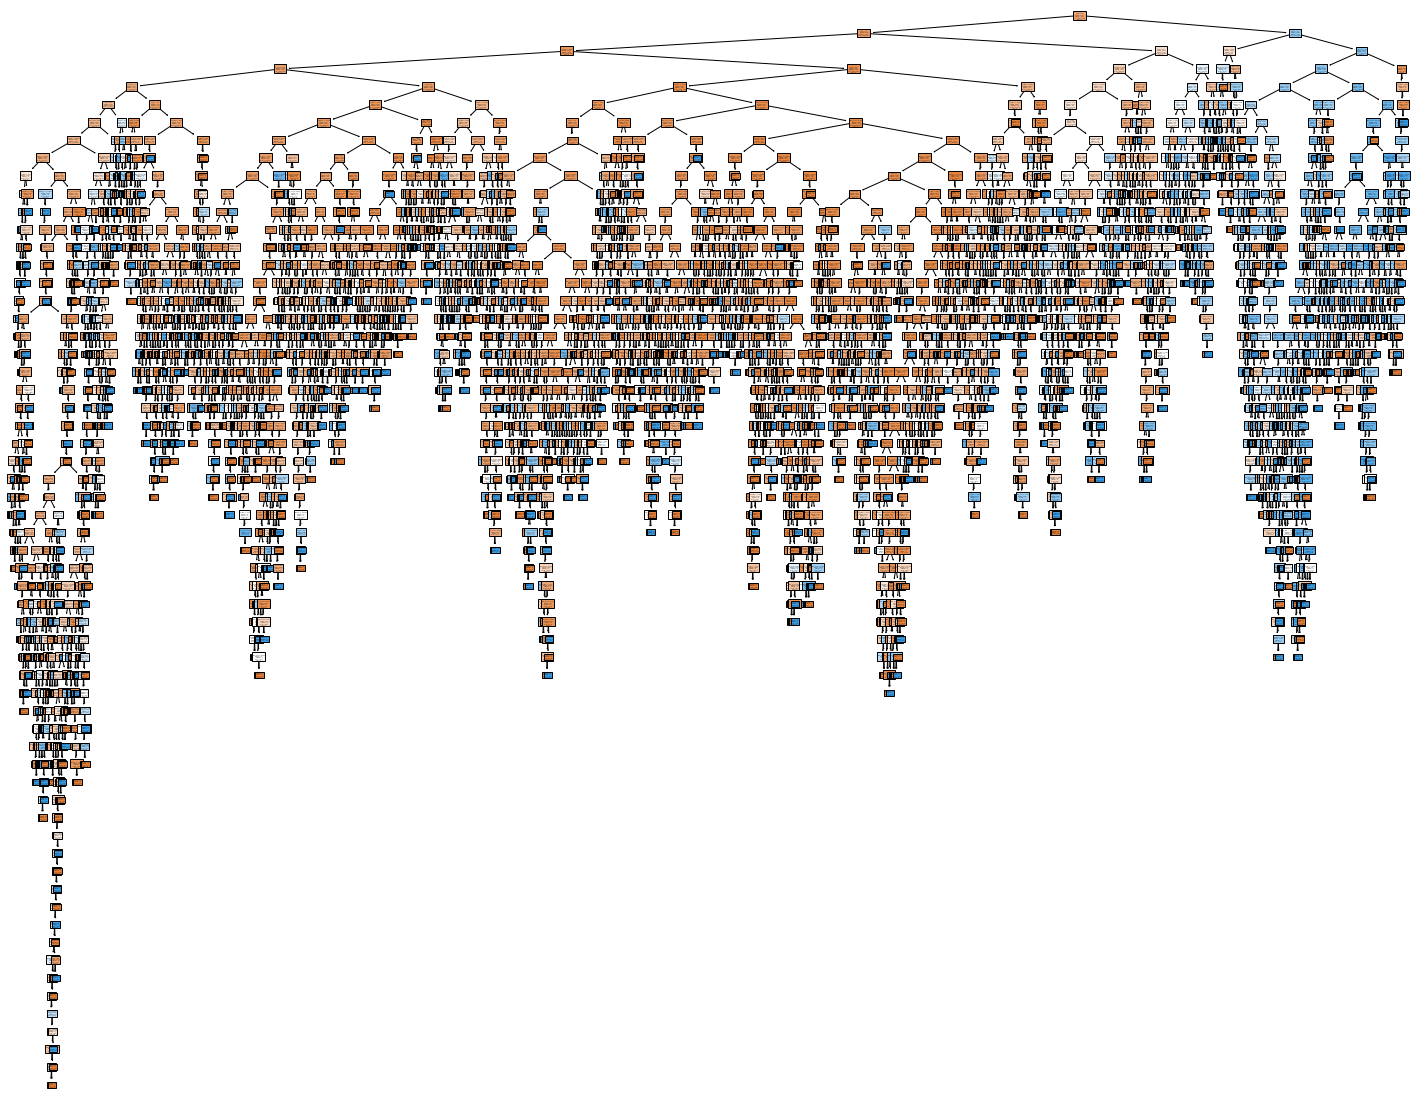

In [12]:
feature_names = attributes.columns[:24]
fig = plt.figure(figsize=(25, 20))
_ = tree .plot_tree(DT_Model, feature_names=feature_names,
                    class_names='default.payment', filled=True)
fig.savefig("DT_result.png")


In [10]:
test_attributes = NewCustomers.drop('default.payment.next.month', axis=1)
test_label = NewCustomers['default.payment.next.month']

y_prediction = DT_Model.predict(test_attributes)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_label, y_prediction))
print(classification_report(test_label, y_prediction))


[[3314  628]
 [ 646  412]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      3942
           1       0.40      0.39      0.39      1058

    accuracy                           0.75      5000
   macro avg       0.62      0.62      0.62      5000
weighted avg       0.74      0.75      0.74      5000



In [11]:
Prediction_result = pd.DataFrame(test_attributes)
Prediction_result["Prediction_result"] = y_prediction

Prediction_result.to_csv('Prediction_Result_DT.csv', mode='a', header=True)